In [49]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/telco-customer-churn/WA_Fn-UseC_-Telco-Customer-Churn.csv


# Telecom Customer Churn

In [96]:
df = pd.read_csv('/kaggle/input/telco-customer-churn/WA_Fn-UseC_-Telco-Customer-Churn.csv')

In [51]:
df

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,6840-RESVB,Male,0,Yes,Yes,24,Yes,Yes,DSL,Yes,...,Yes,Yes,Yes,Yes,One year,Yes,Mailed check,84.80,1990.5,No
7039,2234-XADUH,Female,0,Yes,Yes,72,Yes,Yes,Fiber optic,No,...,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),103.20,7362.9,No
7040,4801-JZAZL,Female,0,Yes,Yes,11,No,No phone service,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.60,346.45,No
7041,8361-LTMKD,Male,1,Yes,No,4,Yes,Yes,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Mailed check,74.40,306.6,Yes


## Checking for null values

In [70]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


## EDA

### Graph EDA

### Gender vs Churn

In [97]:
percent_churn_gender = df.groupby(['gender'])['Churn'].value_counts().unstack().divide(df.groupby(['gender'])['Churn'].value_counts().unstack().sum(axis=1), axis=0)*100
percent_churn_gender

Churn,No,Yes
gender,,
Female,73.079128,26.920872
Male,73.839662,26.160338


<AxesSubplot:title={'center':'Gender vs churn'}, xlabel='gender', ylabel='Percent churn'>

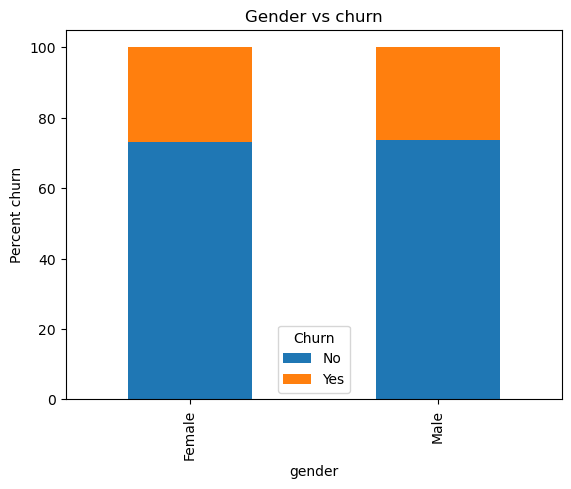

In [98]:
percent_churn_gender.plot(kind="bar", stacked=True, title='Gender vs churn',ylabel="Percent churn")

The chart does not tell that there is a difference between whether females or males churn more.

### Senior Citizen vs churn

In [116]:
df['SeniorCitizen'] = df['SeniorCitizen'].map({1:'Yes', 0:'No'})
percent_churn_senior = df.groupby(['SeniorCitizen'])['Churn'].value_counts().unstack().divide(df.groupby(['SeniorCitizen'])['Churn'].value_counts().unstack().sum(axis=1), axis=0)*100
percent_churn_senior

Churn,No,Yes
SeniorCitizen,,
No,76.393832,23.606168
Yes,58.318739,41.681261


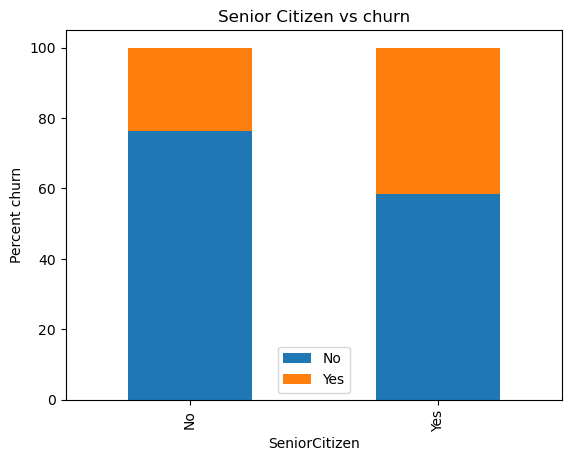

In [118]:
percent_churn_senior.plot(kind="bar", stacked=True, title='Senior Citizen vs churn',ylabel="Percent churn").legend(['No','Yes'])
df['SeniorCitizen'] = df['SeniorCitizen'].map({'Yes':1, 'No':0})

The graph shows that senior citizens are more likely to churn.

### Partner vs Churn

In [119]:
percent_churn_partner = df.groupby(['Partner'])['Churn'].value_counts().unstack().divide(df.groupby(['Partner'])['Churn'].value_counts().unstack().sum(axis=1), axis=0)*100
percent_churn_partner

Churn,No,Yes
Partner,,
No,67.042021,32.957979
Yes,80.335097,19.664903


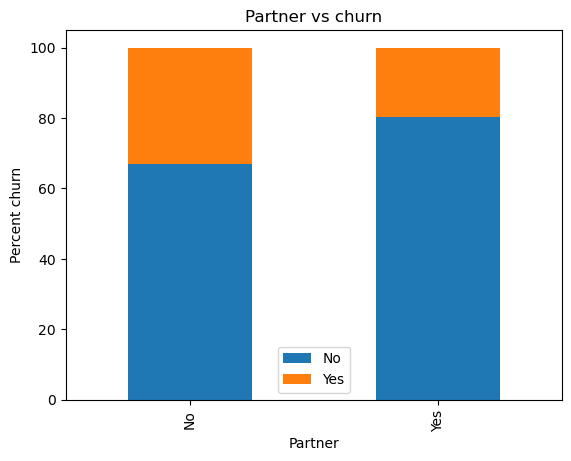

In [121]:
percent_churn_partner.plot(kind="bar", stacked=True, title='Partner vs churn',ylabel="Percent churn").legend(['No','Yes'])

People with a partner are less likely to churn.

### Dependents vs Churn

In [122]:
percent_churn_dependents = df.groupby(['Dependents'])['Churn'].value_counts().unstack().divide(df.groupby(['Dependents'])['Churn'].value_counts().unstack().sum(axis=1), axis=0)*100
percent_churn_dependents

Churn,No,Yes
Dependents,,
No,68.720860,31.279140
Yes,84.549763,15.450237


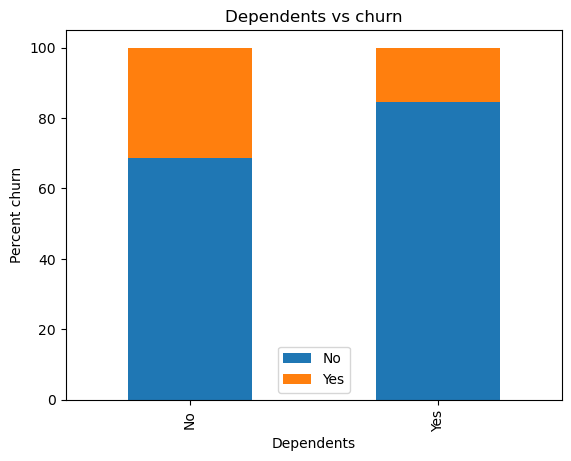

In [123]:
percent_churn_dependents.plot(kind="bar", stacked=True, title='Dependents vs churn',ylabel="Percent churn").legend(['No','Yes'])

People with dependents are less likely to churn.

### Tenure vs Churn

In this section, I will calculate the probability that a customer will churn at each tenure level. I will use the formula 
$$ P(churn | tenure = x) = \frac{P(churn \cap tenure = x)}{P(tenure)} $$
for the values x = 0 to 72 months. I will then plot the graph for the correlation between tenure and the probability of churn.

In [166]:
tenure_churn = []
for i in df.tenure.unique():
    tenure_churn.append([i,len(df[(df.tenure == i) & (df.Churn == 'Yes')])/len(df[df.tenure == i])])
tenure_churn_table = pd.DataFrame(tenure_churn, columns=['Tenure', 'Churn probability'])

<AxesSubplot:xlabel='Tenure'>

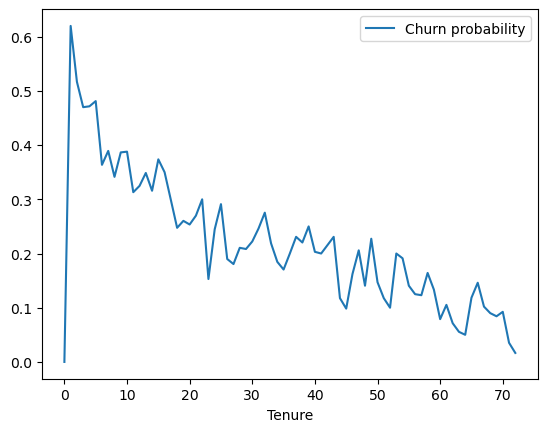

In [169]:
tenure_churn_table.sort_values(by=['Tenure']).plot(x='Tenure',y='Churn probability')

As the customer stays with the provider for longer, the probability that it will churn will decrease. However, the probability that it will churn will go back up and then down.

## Feature Engineering

## Changing categorical variables to 1's and 0's

In [ ]:
df['Female'] = pd.Series(np.where(df.gender.values == 'Female', 1, 0),df.index)
df = df.drop('gender',axis=1)

### Converting yes and no.

In [ ]:
for i in ['Partner','Dependents','PhoneService','MultipleLines','OnlineSecurity','OnlineBackup','DeviceProtection','TechSupport','StreamingTV','StreamingMovies','PaperlessBilling','Churn']:
    df[i] = df[i].map({'Yes': 1, 'No': 0})

In [ ]:
df = df.fillna(0)

### One-hot encoding with non-binary categorical columns

In [ ]:
df = df.join(pd.get_dummies(df['InternetService'],prefix='InternetService').drop('InternetService_No',axis=1))
df=df.drop('InternetService',axis=1)

In [ ]:
df = df.join(pd.get_dummies(df['PaymentMethod'],prefix='PaymentMethod'))
df = df.join(pd.get_dummies(df['Contract'],prefix='Contract'))
df=df.drop(['PaymentMethod','Contract'],axis=1)

## Predicting customer churn

### Logistic Regression

In [ ]:
from sklearn.linear_model import LogisticRegression
clf = LogisticRegression(random_state=0).fit(df.drop(['Churn','customerID','TotalCharges'],axis=1), df.Churn)
clf.predict(df.drop(['Churn','customerID','TotalCharges'],axis=1))